## 기본세팅

In [2]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

## 케어메이트(간병인)

### 데이터 활용 목적 : 케어메이트 특성 파악 후 최적 서비스 기획용

In [7]:
## 데이터프레임 생성
# 첫 번째 데이터프레임 : 남녀 성비
gender_ratio = {
    '성별': ['남성', '여성'],
    '당월(2024년 3월)(%)': [27.5, 72.5],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [24.8, 75.2]
}
df_gender_ratio = pd.DataFrame(gender_ratio)

# 두 번째 데이터프레임 : 연령별 분포
caremate_age = {
    '연령': ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'],
    '당월(2024년 3월)(%)': [6.4, 18, 25.9, 24.3, 19.6, 5.5, 0.3, 0, 0],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [0, 4, 12.9, 22.5, 29.2, 25.5, 5.7, 0.3, 0]
}
df_caremate_age = pd.DataFrame(caremate_age)

# 세 번째 데이터프레임 : 선호 지역 분포
prefer_region = {
    '지역명': ['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종'],
    '당월(2024년 3월)(%)': [2.2, 6, 6, 3.8, 14.2, 5.7, 1.5, 19.2, 6.2, 5.3, 6.5, 6.3, 5.9, 2.6, 6.6, 1.1, 1],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [21.9, 5.4, 5.5, 4.8, 6.9, 4.6, 1.5, 17.8, 3.6, 3.1, 4.4, 4.7, 4.6, 2.8, 6.3, 1.5, 0.6]
}
df_prefer_region = pd.DataFrame(prefer_region)

# 네 번째 데이터프레임 : 케어메이트 정보 및 돌봄 경험 요약
caremate_info = {
    '기간': ['당월(2024년 3월)(일)', '전체(2020년 9월 ~ 2024년 3월)(일)'],
    '연령': [49.6, 52.2],
    '외국인 비율(%)': [2.4, 2.7],
    '기저귀(%)': [5.8, 12.1],
    '피딩(%)': [3.2, 7.4],
    '석션(%)': [2.8, 6.2],
    '욕창(%)': [3.7, 8.8]
}
df_caremate_info = pd.DataFrame(caremate_info)

In [9]:
# 케어메이트 남녀 성비
df_gender_ratio

,성별,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,남성,27.5,24.8
1,여성,72.5,75.2


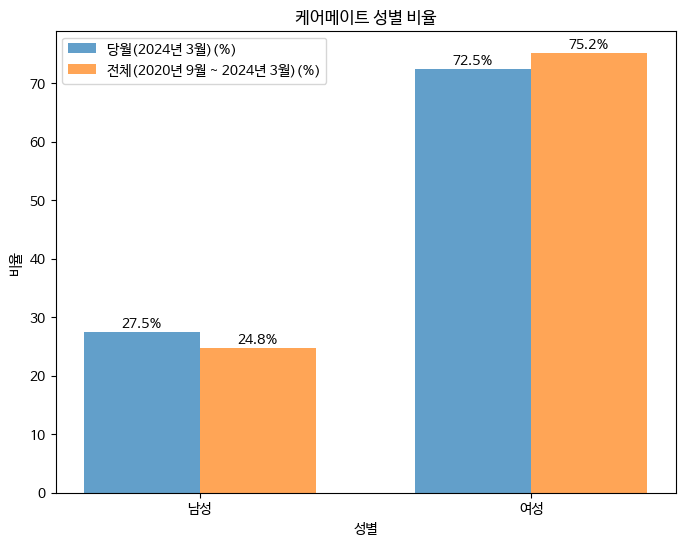

In [14]:
# 케어메이트 남녀 성비

bar_width = 0.35
index = np.arange(len(df_gender_ratio['성별']))

plt.figure(figsize=(8, 6))

bar1 = plt.bar(index, df_gender_ratio['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width, df_gender_ratio['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('케어메이트 성별 비율')
plt.xlabel('성별')
plt.ylabel('비율')
plt.xticks(index + bar_width / 2, df_gender_ratio['성별'])
plt.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f%%' % height, ha='center', va='bottom')

plt.show()

In [10]:
# 케어메이트 연령별 분포
df_caremate_age

,연령,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,10대,6.4,0.0
1,20대,18.0,4.0
2,30대,25.9,12.9
3,40대,24.3,22.5
4,50대,19.6,29.2
5,60대,5.5,25.5
6,70대,0.3,5.7
7,80대,0.0,0.3
8,90대,0.0,0.0


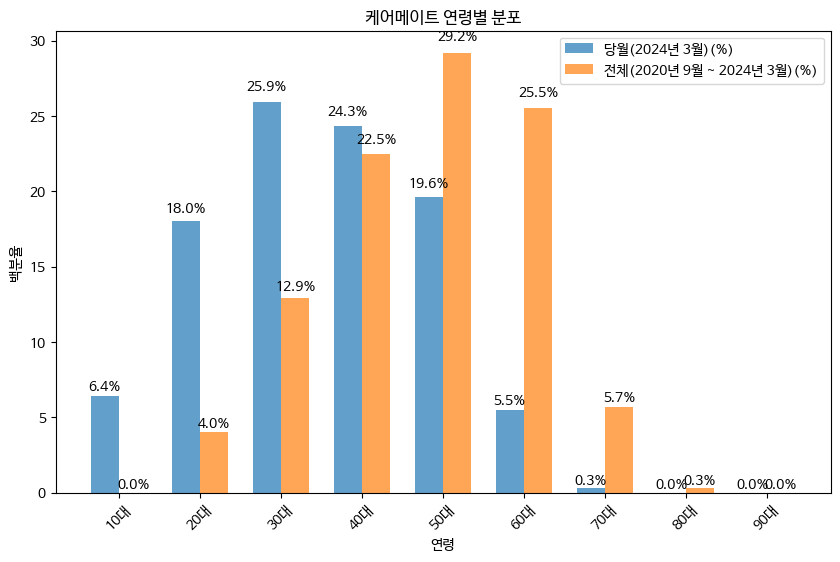

In [15]:
# 케어메이트 연령별 분포

# 막대 그래프 생성
bar_width = 0.35
index = np.arange(len(df_caremate_age))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index - bar_width/2, df_caremate_age['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width/2, df_caremate_age['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('케어메이트 연령별 분포')
plt.xlabel('연령')
plt.ylabel('백분율')
plt.xticks(index, df_caremate_age['연령'], rotation=45)
plt.legend()

# 수치 추가
for i, rect in enumerate(bar1):
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.02 * rect.get_height(), '%.1f%%' % df_caremate_age.iloc[i, 1], ha='center', va='bottom')

for i, rect in enumerate(bar2):
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.02 * rect.get_height(), '%.1f%%' % df_caremate_age.iloc[i, 2], ha='center', va='bottom')

plt.show()

In [12]:
# 케어메이트 선호 지역 분포
df_prefer_region

,지역명,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,서울,2.2,21.9
1,부산,6.0,5.4
2,인천,6.0,5.5
3,대구,3.8,4.8
4,광주,14.2,6.9
5,대전,5.7,4.6
6,울산,1.5,1.5
7,경기,19.2,17.8
8,강원,6.2,3.6
9,충북,5.3,3.1


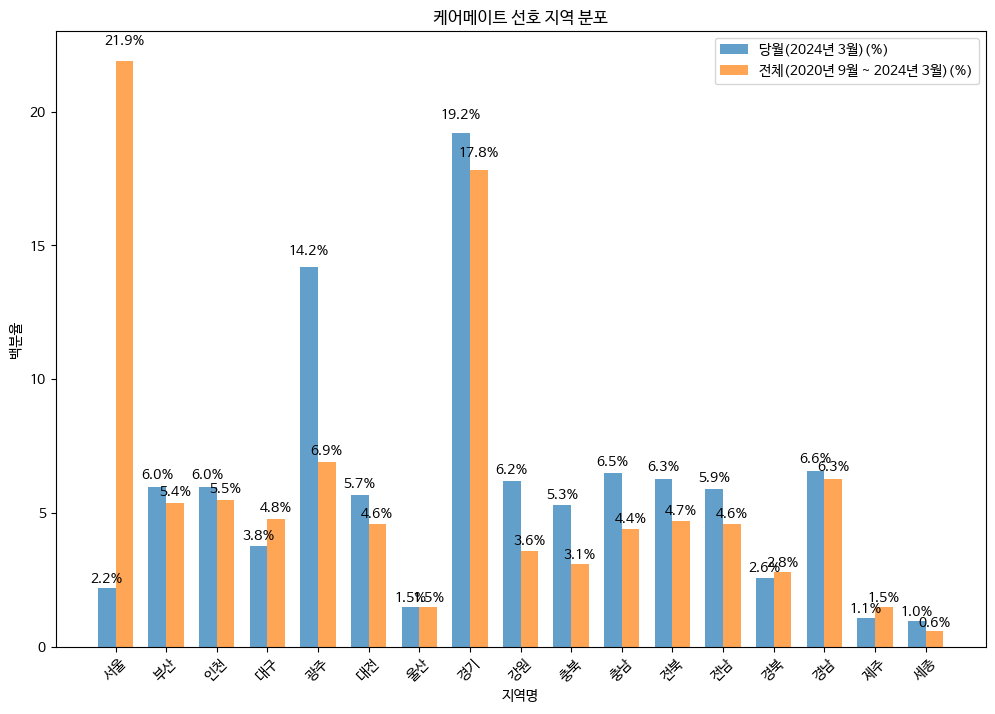

In [16]:
# 케어메이트 선호 지역 분포

# 막대 그래프 생성
bar_width = 0.35
index = np.arange(len(df_prefer_region))

plt.figure(figsize=(12, 8))

bar1 = plt.bar(index - bar_width/2, df_prefer_region['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width/2, df_prefer_region['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('케어메이트 선호 지역 분포')
plt.xlabel('지역명')
plt.ylabel('백분율')
plt.xticks(index, df_prefer_region['지역명'], rotation=45)
plt.legend()

# 수치 추가
for i, rect in enumerate(bar1):
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.02 * rect.get_height(), '%.1f%%' % df_prefer_region.iloc[i, 1], ha='center', va='bottom')

for i, rect in enumerate(bar2):
    plt.text(rect.get_x() + rect.get_width() / 2.0, 1.02 * rect.get_height(), '%.1f%%' % df_prefer_region.iloc[i, 2], ha='center', va='bottom')

plt.show()

In [13]:
# 케어메이트 정보 및 돌봄 경험 요약
df_caremate_info

,기간,연령,외국인 비율(%),기저귀(%),피딩(%),석션(%),욕창(%)
0,당월(2024년 3월)(일),49.6,2.4,5.8,3.2,2.8,3.7
1,전체(2020년 9월 ~ 2024년 3월)(일),52.2,2.7,12.1,7.4,6.2,8.8


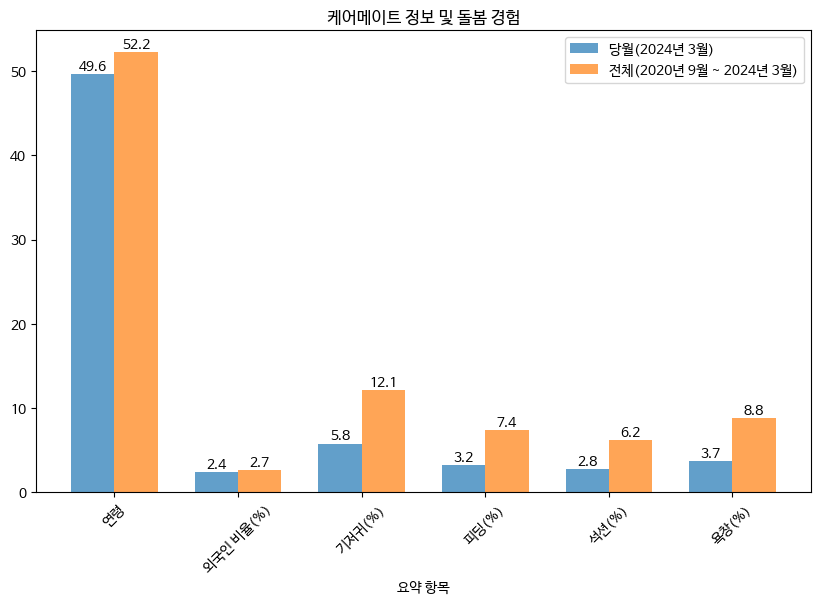

In [17]:
# 케어메이트 정보 및 돌봄 경험 요약

# 막대 그래프 생성
bar_width = 0.35
index = np.arange(len(df_caremate_info.columns[1:]))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index - bar_width/2, df_caremate_info.iloc[0, 1:], bar_width, alpha=0.7, label='당월(2024년 3월)')
bar2 = plt.bar(index + bar_width/2, df_caremate_info.iloc[1, 1:], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)')

plt.title('케어메이트 정보 및 돌봄 경험')
plt.xlabel('요약 항목')
plt.xticks(index, df_caremate_info.columns[1:], rotation=45)
plt.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height, ha='center', va='bottom')

plt.show()

## 케어메이트 정보 정리

#### 1. 성별 비율 - 여성이 남성보다 약 50% 더 많음

#### 2. 연령별 분포
   ##### 1) 당월(2024년 3월) : 30대 > 40대 > 50대 > 20대 ...순
   ##### 2) 전체기간 : 50대 > 60대 > 40대 > 30대 ...순
   
#### 3. 선호 지역
   ##### 1) 당월(2024년 3월) : 경기 > 광주 > 경남 > 충남 ...순
   ##### 2) 전체기간 : 서울 > 경기 > 광주 > 경남 ...순
   
#### 4. 케어메이트 정보 및 돌봄 경험
###### (연령은 평균치이며 기저귀, 피딩, 석션, 욕창의 경우 해당 상태를 갖는 환자를 돌본 경험이 있는 케어메이트의 비율, 케어네이션에서 돌봄 활동 이력이 있는 케어메이트에 한함)
   #####   1) 연령은 평균 52.2세
   ##### 2) 외국인 보다는 자국민의 비율이 절대적
   ##### 3) 기저귀, 피딩, 석션, 욕창의 비율이 낮음 → 환자의 상태와 요구에 따라 다양할 수 있겠으나, 아래와 같은 돌봄 활동이 필요할 것으로 사료됨
   ######  (1) 기본 생활지원 : 목욕, 입욕, 개인 위생 관리, 의복 교체, 식사 준비 및 섭취, 화장실 도움
   ######  (2) 의약품 관리 : 환자의 약물 복용을 지원하고 의약품을 관리. 간병인은 환자에게 정확한 약을 제공하고, 복용 시간을 지켜주며, 의사 또는 간호사의 지시에 따라 의약품을 관리할 수 있음
   ######  (3) 상담과 정서적 지원 : 간병인은 환자와 가족에게 정서적인 지원을 제공할 수 있음. 이는 대화, 듣기, 위로, 치료적인 손길 등을 통해 정서적 안정감을 제공하는 것을 포함할 수 있음
   ######  (4) 활동 지원 : 환자를 산책시키거나 실외 활동에 참여시키는 것부터 심리적 또는 사회적 활동을 제공하는 등
   ######  (5) 의료 및 재활 지원 : 일부 간병인은 환자의 의료 및 재활 프로그램에 지원을 제공할 수 있음. 물리치료, 작업치료, 언어치료, 운동 프로그램 등을 포함
   ######  (6) 환경 관리 : 환자의 주거 환경을 관리하고 유지하는 데 도움을 줄 수 있음. 집안 청소, 세탁, 가사일 등을 포함.
   ######  (7) 보고 및 문서 작성 : 환자의 상태 및 돌봄에 대한 보고를 작성하고 의사, 간호사 또는 가족과 협력하여 환자의 상태를 모니터링하고 관리

## 결론

##### 1) '서울'의 선호지역이 비율이 당월에는 다소 많이 떨어지지만, 전체기간에서는 압도적으로 높음 → 환자 거주 지역 가장 높은 곳과 일치 
##### 2) 젊으면 젊은대로의 이점(활력,체력적 요소 등)과 나이가 있는 사람은 연륜으로 간병인을 돌보는데에 다양한 이점이 있음
   ##### → 간병인에 대한 복지 및 사회 인식 제고하여 환자에게 더 나은 서비스를 제공, 환자는 더 편해지고 만족도 상승
   ##### → 간병인에 대한 긍정적인 사회적 인지도 함양하여 다양한 연령대의 전문 간병인 양성
##### 3) 리포트에 누락된 것인지 혹은 그 외 활동은 지원하지 않는 것인지는 알 수 없으나, 위 명시된 돌봄 경험 외에도 다양한 활동이 요구됨(위 7가지 예시)

##### ▶ 환자와 케어메이트의 수요와 공급의 접점인 '서울'에 집중하여, 기저귀, 피딩, 석션, 욕창 등 환자의 신체적인 불편함을 덜어줄 뿐만 아니라 정서적인 지원과 의료 관리를 담당하는 등의 역할을 맡아 환자에게 더 질 좋은 서비스를 공급할 수 있도록 한다.